<a href="https://colab.research.google.com/github/sanislearning/ml_playground/blob/main/TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data=pd.read_csv('/content/drive/MyDrive/PData/TitanicTrain.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info() #Currently have a few columns we need to deal with, including the ones with the object datatype and the ones with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.drop(columns=['PassengerId'],inplace=True) #PassengerId will not have a useful effect on the model so dropping it

In [9]:
data['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [10]:
data.drop(columns=['Cabin'],inplace=True) #Cabin values are going to be dropped for the purposes of this model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [11]:
data['Title']=data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip() #Extracting the useful parts from the names, that is the titles such as Mr,Miss,Mrs,Master

In [12]:
data.drop(columns=['Name'],inplace=True) #Now we can get rid of the Name column

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [14]:
data['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [15]:
title_map={
    'Dr':'Rare',
    'Rev':'Rare',
    'Col':'Rare',
    'Mlle':'Miss',
    'Major':'Rare',
    'Ms':'Miss',
    'Mme':'Mrs',
    'Don':'Rare',
    'Lady':'Rare',
    'Sir':'Rare',
    'Capt':'Rare',
    'the Countess':'Rare',
    'Jonkheer':'Rare'
}
data['Title']=data['Title'].replace(title_map) #titles with very low counts will just add noise, instead replacing them using a map function to rare

In [16]:
data['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


In [17]:
data.info()
print(data.head())
from sklearn.preprocessing import LabelEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0     

In [18]:
le=LabelEncoder()
le.fit(data['Sex'])
print(le.classes_)
data['Sex']=le.transform(data['Sex'])
#Converting the Sex column datatype to int64

['female' 'male']


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [20]:
#Handling Missing data in Age and Embarked
data['Age']=data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median())) #filling null with the median value of age for the particular title
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #filling null with the mode of the Embarked column

<ipython-input-20-46b0b16fb86f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #filling null with the mode of the Embarked column


In [21]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0
Title,0


In [22]:
data['Embarked']=le.fit_transform(data['Embarked'])
print(le.classes_)
data['Title']=le.fit_transform(data['Title'])
print(le.classes_)

['C' 'Q' 'S']
['Master' 'Miss' 'Mr' 'Mrs' 'Rare']


In [23]:
data=data.drop('Ticket',axis=1) #another way to drop stuff, axis value decides if column or row
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


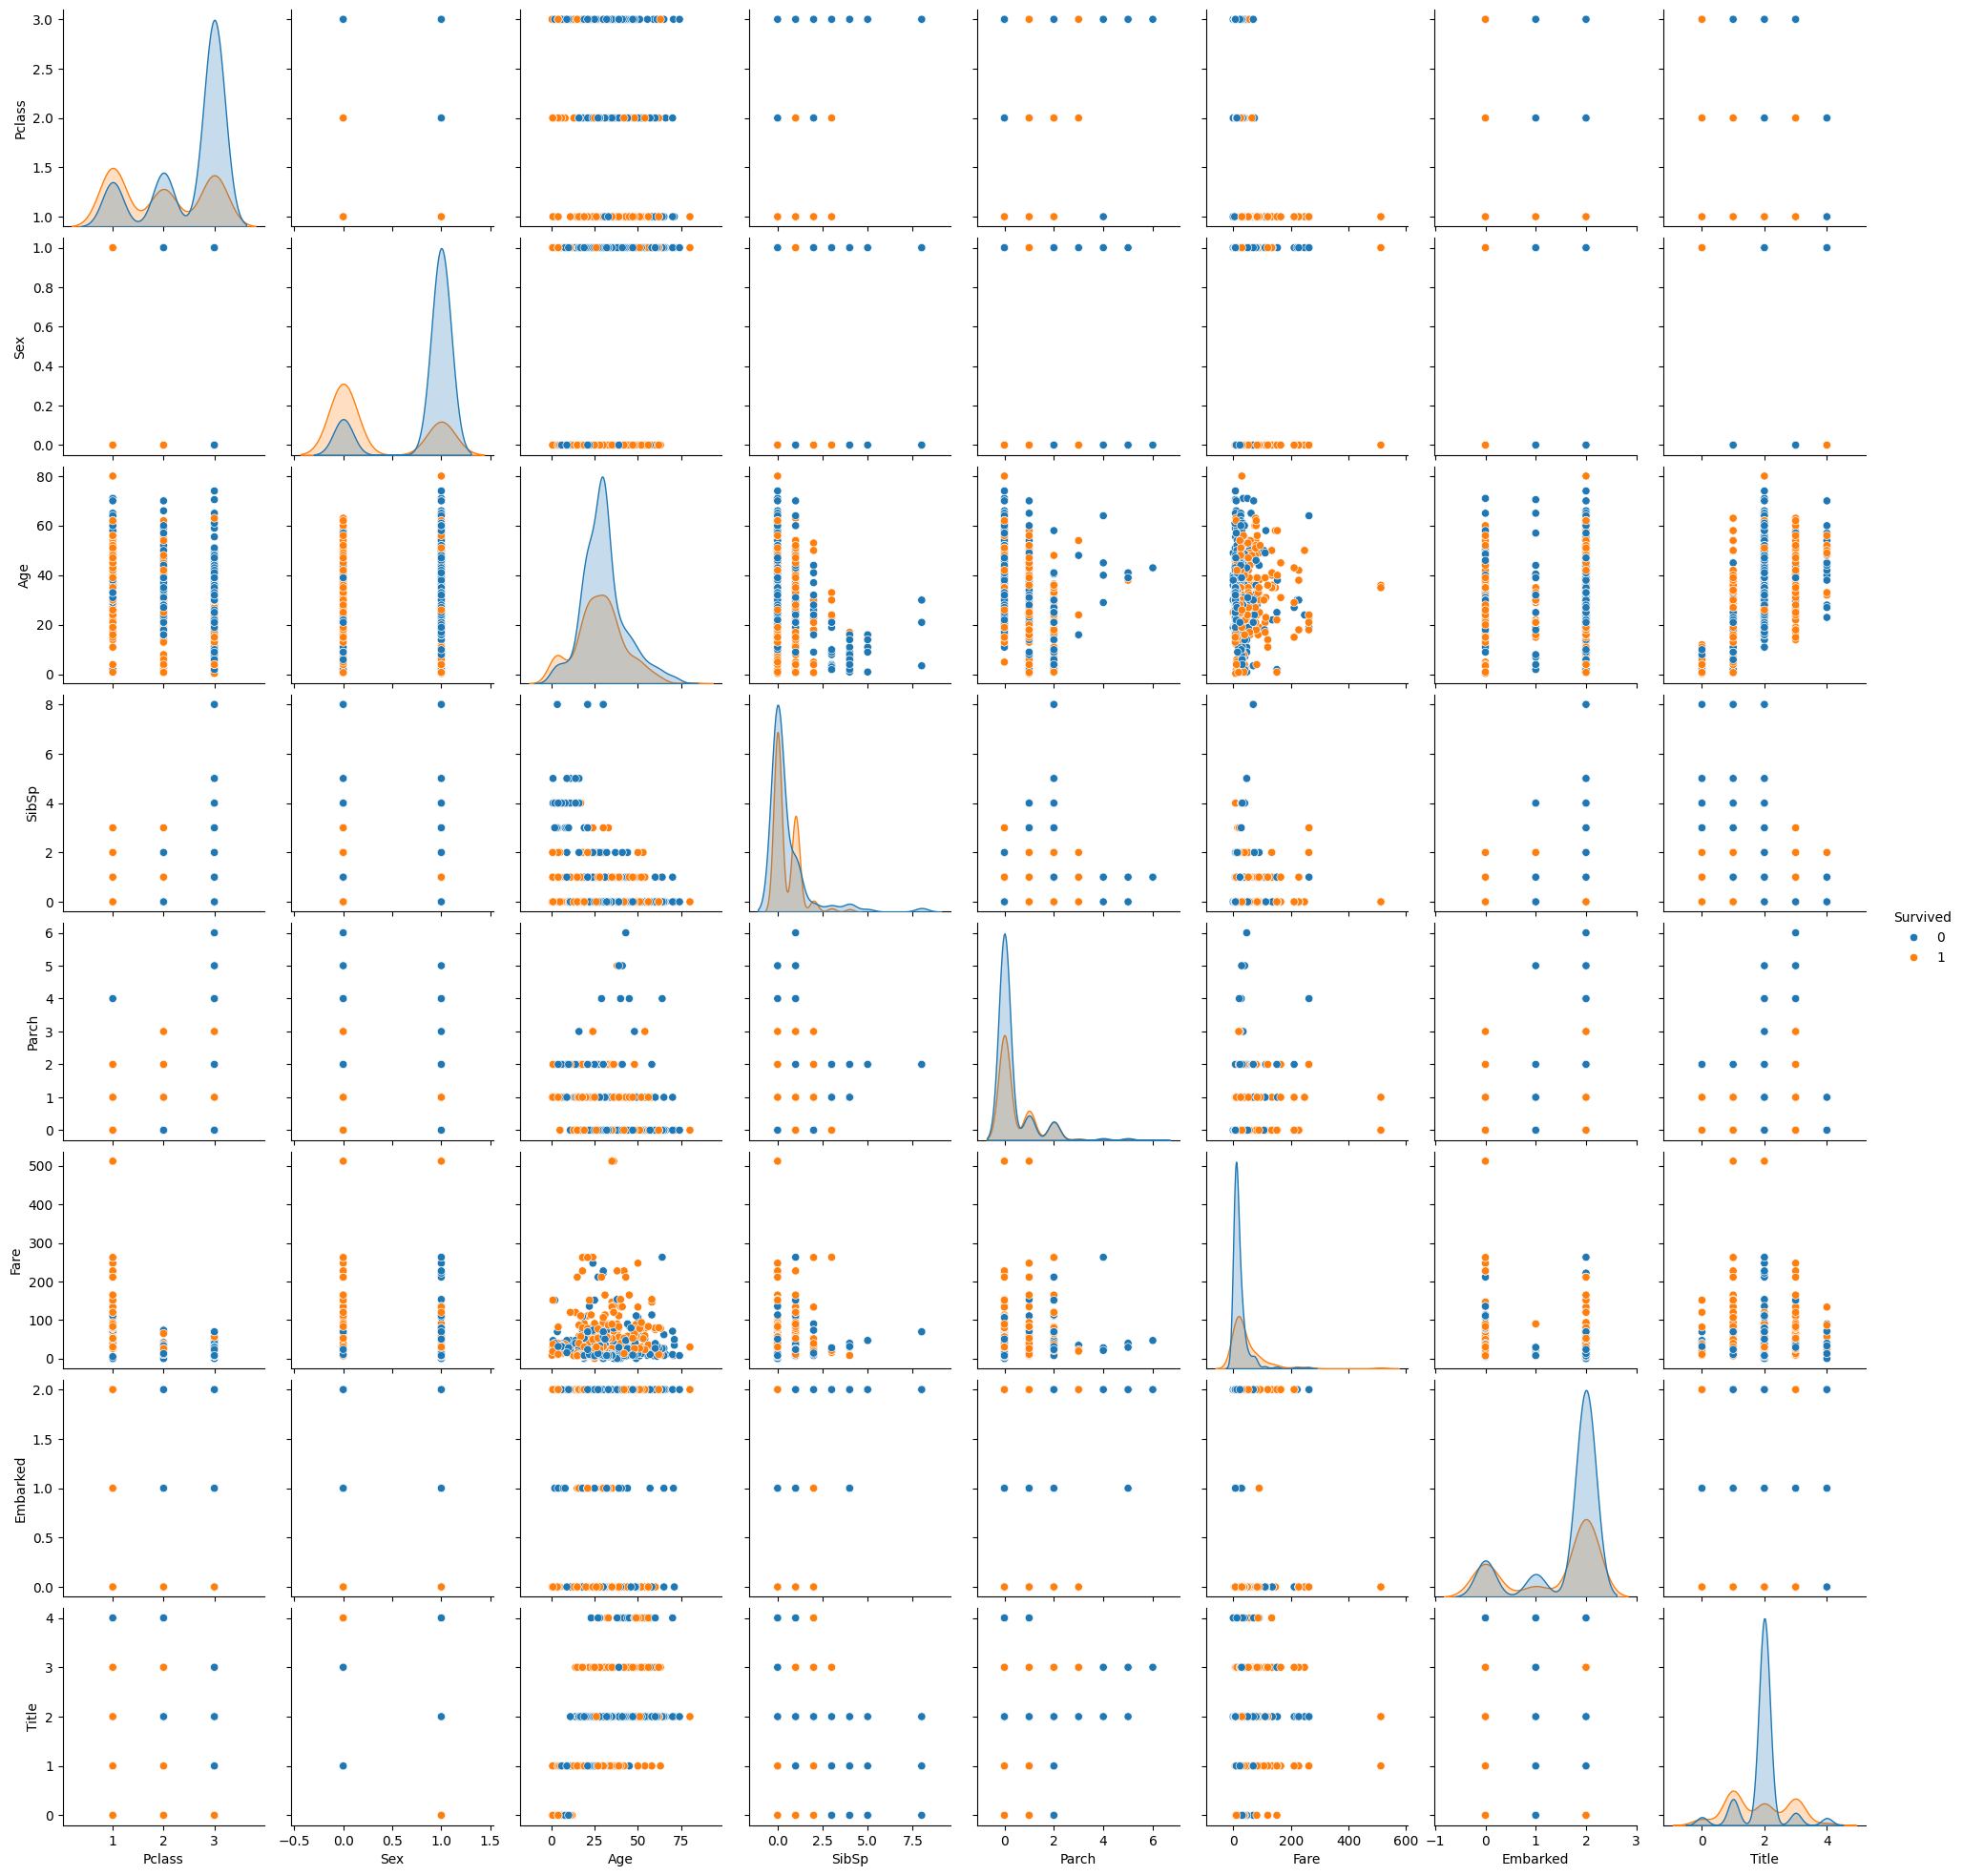

In [24]:
sns.pairplot(data,hue='Survived')
plt.show()

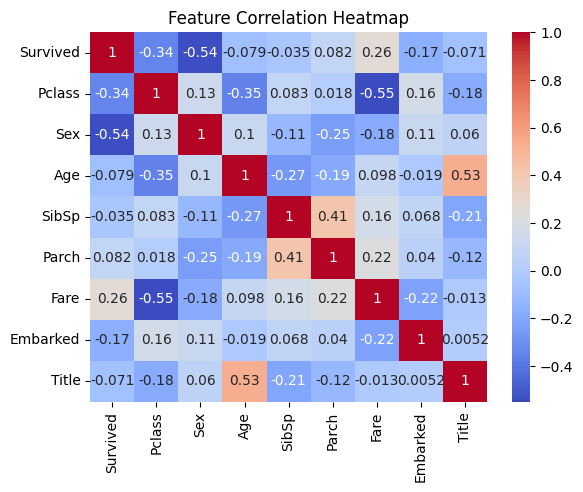

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#Modelling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [27]:
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.3)

##LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [31]:
print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}")

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.78      0.66      0.71       106

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Accuracy Score: 79.10


##DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}")

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       162
           1       0.70      0.67      0.69       106

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

Accuracy Score: 75.75
